# Covid-19 cases development in Czech Republic

Data from: https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19
Downloaded on: 22.04.2020

### Importing data
```python
head()
``` 
displays first 5 rows

In [6]:
import pandas as pd
cases = pd.read_csv('data/nakaza.csv')
display(cases.head())

,datum,pocet_den,pocet_celkem
0,2020-01-27,0,0
1,2020-01-28,0,0
2,2020-01-29,0,0
3,2020-01-30,0,0
4,2020-01-31,0,0


### Total cases plot

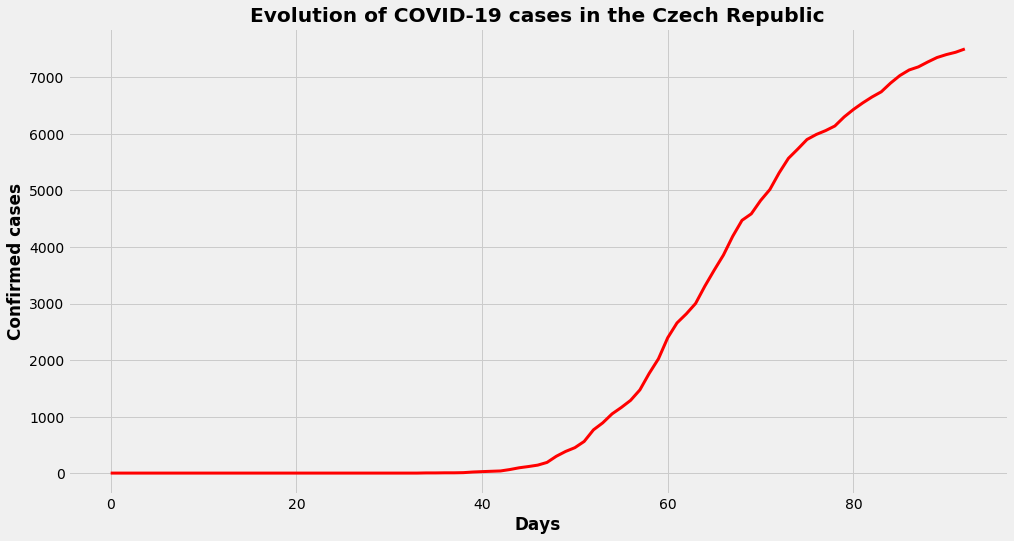

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import random

cases = pd.read_csv('data/nakaza.csv')
days = list(range(0, len(cases)))
#print(days)
#display(cases)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
plt.plot(days, cases.pocet_celkem, label = "Number of cases", color="red", linewidth=3, linestyle='-')
plt.xlabel("Days", fontweight='bold')
plt.ylabel("Confirmed cases", fontweight='heavy')

plt.title('Evolution of COVID-19 cases in the Czech Republic', fontweight='heavy')
plt.show()

### New cases per day

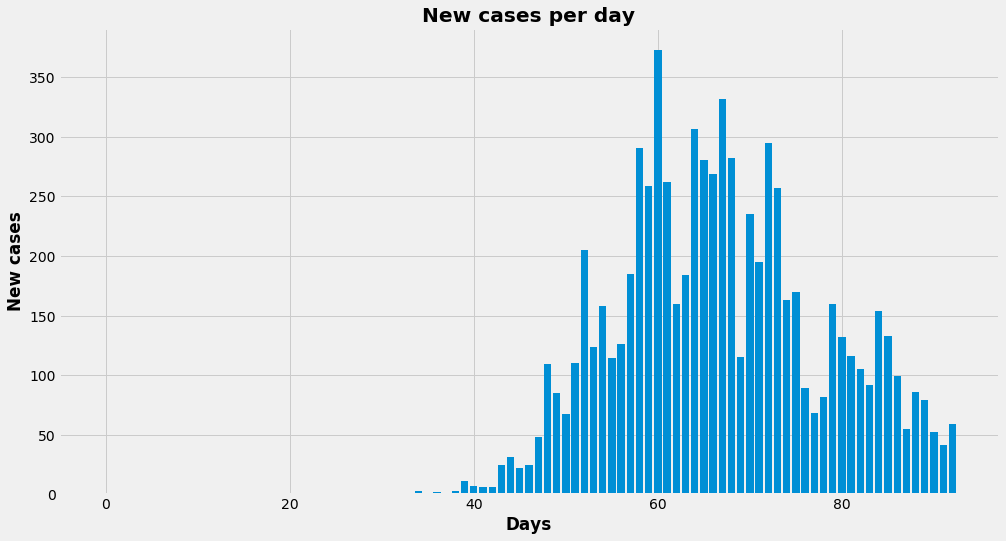

In [8]:
plt.figure(figsize = (15,8))
plt.bar(days, cases.pocet_den, alpha=1)
plt.xlabel("Days", fontweight='bold')
plt.ylabel("New cases", fontweight='bold')
plt.title("New cases per day", fontweight='bold')
plt.show()

### Total and new cases combined

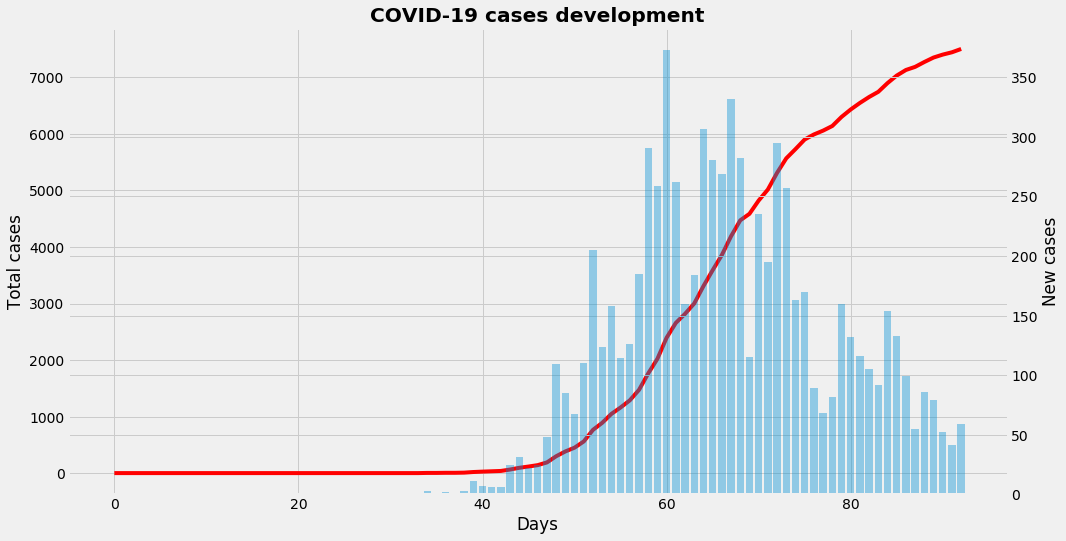

In [10]:
fig, ax1 = plt.subplots(figsize = (15,8))
plt.title("COVID-19 cases development", fontweight='heavy')

ax1.set_xlabel("Days")
ax1.set_ylabel("Total cases")
ax1.plot(days, cases.pocet_celkem, color='red')

ax2 = ax1.twinx()   # new axes, second one with shared x
ax2.set_ylabel("New cases")
ax2.bar(days, cases.pocet_den, alpha = 0.4)

plt.show()

### Combined graph with dates

This graph shows total number of cases and daily development (second y-axis) <br>
The x-axis is organised in weeks with according dates

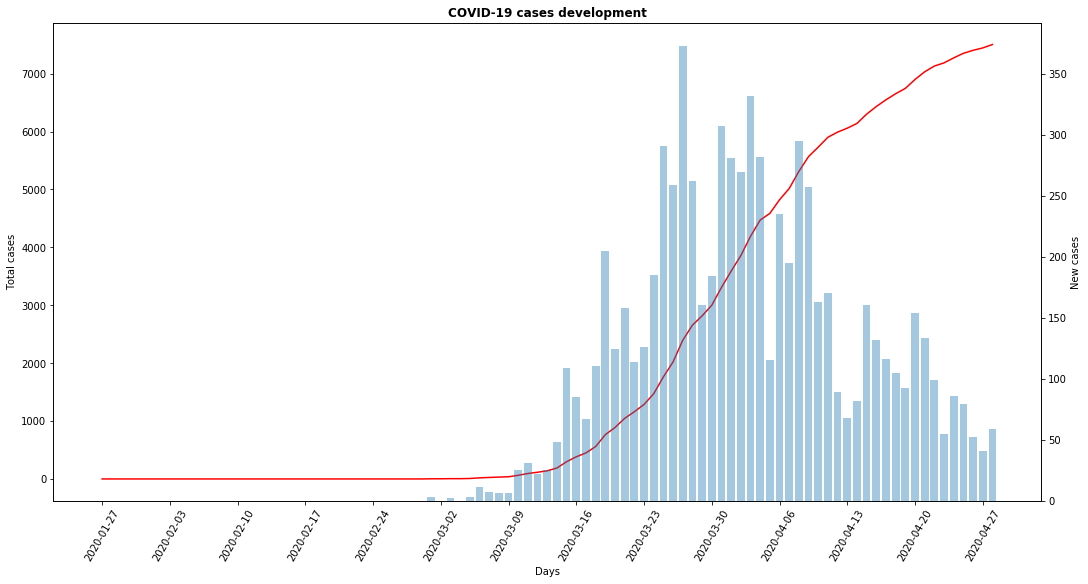

In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
cases = pd.read_csv('data/nakaza.csv')
days = list(range(0, len(cases)))

# Create ticks=x-axis labels
# Start with first day from the datum column and interate by weeks
day_tick = []      # index of the date's row
day_tick_name = [] # date as string (cases.datum column)
i = 0
for day in cases.datum:
    if i%7==0:  # 7 days steps
        day_tick.append(i)
        day_tick_name.append(day)
    i = i+1    

# Plot settings
fig, ax1 = plt.subplots(figsize = (15,8), constrained_layout=True)   # constrained_layout=True needed, otherwise x-ticks cut
plt.title("COVID-19 cases development", fontweight='heavy')
plt.xticks(rotation =60)

# Total cases plot
ax1.set_xlabel("Days")
ax1.set_ylabel("Total cases")
ax1.set_xticks(day_tick)
ax1.set_xticklabels(day_tick_name)
ax1.plot(days, cases.pocet_celkem, color='red')

# New cases plot
ax2 = ax1.twinx()   # new axes, second one with shared x
ax2.set_ylabel("New cases")
ax2.bar(days, cases.pocet_den, alpha = 0.4)

# Show and save the plot
plt.savefig("plots/combined-cases-graph.png", pad_inches=0.3)
plt.show()


### New cases per date

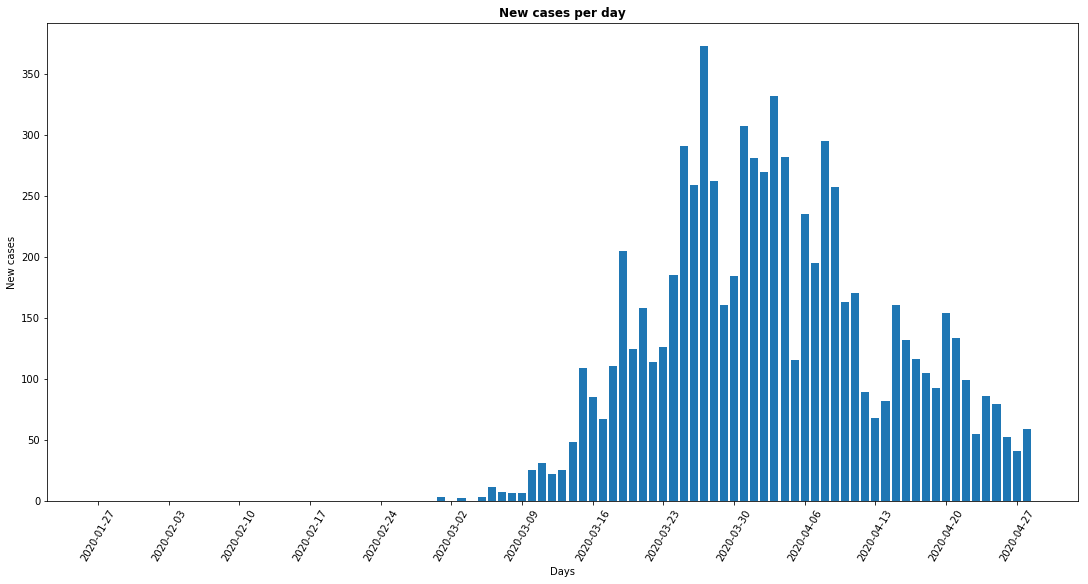

In [5]:
plt.figure(figsize = (15,8), constrained_layout = True)
plt.bar(days, cases.pocet_den, alpha=1)
plt.xlabel("Days", fontweight='normal')
plt.xticks(day_tick, day_tick_name, rotation = 60)

plt.ylabel("New cases", fontweight='normal')
plt.title("New cases per day", fontweight='bold')

plt.savefig("plots/new-cases-graph.png", pad_inches=0.3)
plt.show()